<a href="https://colab.research.google.com/github/Sabarishsusiraj/basic-linear-regresion/blob/main/Building_Linear_Regression_Model_from_scratch_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
class Linear_Regression:
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations
  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.no_of_iterations):
      self.update_weights()
  def update_weights(self):
    y_predicted=self.predict(self.X)
    dw=-(2*(self.X.T).dot(self.Y-y_predicted))/self.m
    db=-2*np.sum(self.Y-y_predicted)/self.m
    self.w=self.w-self.learning_rate*(dw)
    self.b=self.b-self.learning_rate*(db)
  def predict(self,X):
    return X.dot(self.w)+self.b


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
salary_data=pd.read_csv("/content/salary_data.csv")

In [ ]:
print(salary_data.head(10))

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
5              2.9   56642
6              3.0   60150
7              3.2   54445
8              3.2   64445
9              3.7   57189


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [ ]:
X=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,-1].values

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
model=Linear_Regression(0.02,2000)


In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print(model.w)
print(model.b)

[9569.58741261]
24393.165451261353


In [ ]:
test_predict=model.predict(X_test)

Text(0.5, 1.0, 'salary_prediction')

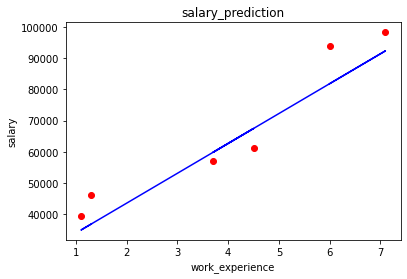

In [ ]:
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,test_predict,color="blue")
plt.xlabel("work_experience")
plt.ylabel("salary")
plt.title("salary_prediction")

In [ ]:
print(test_predict,Y_test)

[36833.62908766 34919.71160514 67456.30880803 59800.63887793
 92337.23608082 81810.68992695] [46205 39343 61111 57189 98273 93940]


In [ ]:
loss=1/model.m*np.sum(Y_test-test_predict)
print(loss)

954.282733894575
